<a href="https://colab.research.google.com/github/xuxiufeng/Blockchain_Simulation_Multiple_Hackers_with_Resetting_Times/blob/main/Exponential%20Hacking%2C%20Exponential%20Resetting%2C%20and%20Exponential%20Detecting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>





*   ***sum_of_x:*** the sum of random amount of time X's for the hacker to hack into m nodes, where X ~ Exp($\lambda$) and $\lambda$ is a rate parameter.
*   ***y:*** a random amount of time Y for the IT department to detect that the blockchain is under a cyber attack from the moment it starts to operate or has just been re-set, where Y ~ Exp($\delta$) and $\delta$ is a rate parameter.
*   ***w:*** a random amount of time for the IT department to reset blockchain when IT department notice a node is being hacked, where W ~ Exp($\eta$) and $\eta$ is a rate parameter.
* ***reset_time_start:*** the array of beginning time of each reset.
* ***reset_time_end:*** the array of end time of each reset.







In [15]:
import numpy as np
import matplotlib.pyplot as plt

In [16]:
class simulation:
    def __init__(self, lambda_list, delta, eta):
        self.lambda_list = lambda_list
        self.delta = delta
        self.eta = eta

    def Generate_Z(self, m):
        lambda_list = self.lambda_list
        sum_of_x_list = []
        for i in range(len(lambda_list)):
            sum_of_x_list.append(np.sum(np.random.exponential(1/lambda_list[i], m)))
        Z = min(sum_of_x_list)
        return Z

    def T_m_and_reset_time(self, m):
        lambda_list, delta, eta = self.lambda_list, self.delta, self.eta
        sum_of_y_and_w = 0
        y = np.random.exponential(1/delta)
        Z_m = self.Generate_Z(m)
        w = np.random.exponential(1/eta)

        reset_time_start = []
        reset_time_end = []

        current_time = 0
        while Z_m > y:

            current_time += y
            reset_time_start.append(current_time)
            current_time += w
            reset_time_end.append(current_time)


            sum_of_y_and_w = sum_of_y_and_w + y + w
            Z_m = self.Generate_Z(m)
            y = np.random.exponential(1/delta)
            w = np.random.exponential(1/eta)
        return sum_of_y_and_w + Z_m, reset_time_start, reset_time_end

    def ET_m(self, m):
      #lamb, delta, eta = self.lamb, self.delta, self.eta
      ET = np.repeat(np.nan, m)
      for i in range(m):
          T_m = 0
          iter = 30000 # iter 50000
          for j in range(iter):
              T_m += self.T_m_and_reset_time(i+1)[0]
          ET[i] = T_m/iter
          print((format((i+1)/m, ".0%")))
      return ET

    def P_mt1(self, t, m, N=30000):
      #lamb, delta, eta = self.lamb, self.delta, self.eta
      res = np.repeat(np.nan, N)
      Prob = np.repeat(np.nan, m)
      node = 1
      for i in range(m):
          for j in range(N):
               dyfunctional_time, reset_time_start, reset_time_end = self.T_m_and_reset_time(node)

               res[j] = t < dyfunctional_time
               for k in range(len(reset_time_start)):
                   reset_start, reset_end = reset_time_start[k], reset_time_end[k]
                   if reset_start < t < reset_end:
                       res[j] = 0

          Prob[i] = np.sum(res)/N
          node += 1
          print((format((i+1)/m, ".0%")))
      return Prob

    def P_mt2(self, t, node, N=30000): # N: iterations
      #lamb, delta, eta = self.lamb, self.delta, self.eta
      res = np.repeat(np.nan, N)


      for j in range(N):
            dyfunctional_time, reset_time_start, reset_time_end = self.T_m_and_reset_time(node)

            res[j] = t < dyfunctional_time
            for k in range(len(reset_time_start)):
                reset_start, reset_end = reset_time_start[k], reset_time_end[k]
                if reset_start < t < reset_end:
                    res[j] = 0

      Prob = np.sum(res)/N

      return Prob

    def T_mNR(self, C1, C2, R, m):
      C1, C2, R = C1*m**.2, C2*m**.3, R*m
      T_m, reset_time_start, reset_time_end= self.T_m_and_reset_time(m)
      sum_of_w = 0
      for j in range(len(reset_time_start)):
          sum_of_w += (reset_time_end[j] - reset_time_start[j])
      return (T_m - sum_of_w)*(R-C2)-C1*sum_of_w, T_m

    def E_mNR(self, C1, C2, R, m, N=30000):
      expected_net_revenue = []
      for node in range(1, m+1):
        sum_of_total_net_revenue_rate = 0
        for i in range(N):
            total_net_revenue, T_m = self.T_mNR(C1, C2, R, node)
            sum_of_total_net_revenue_rate += total_net_revenue/T_m
        expected_net_revenue.append(sum_of_total_net_revenue_rate/N)
      return expected_net_revenue

In [17]:
k = 5
lambda_list = np.random.uniform(10,11,k)
lambda_list

array([10.1582853 , 10.720734  , 10.24882866, 10.69021662, 10.61035419])

In [18]:
m = 40
delta = 1/3
eta = 20
sim = simulation(lambda_list, delta, eta)

2%
5%
8%
10%
12%
15%
18%
20%
22%
25%
28%
30%
32%
35%
38%
40%
42%
45%
48%
50%
52%
55%
57%
60%
62%
65%
68%
70%
72%
75%
78%
80%
82%
85%
88%
90%
92%
95%
98%
100%


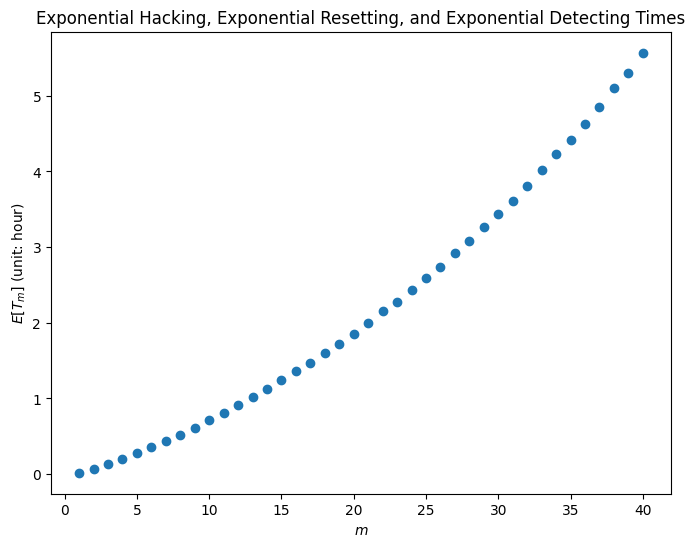

In [19]:
ET_m = sim.ET_m(m)
fig = plt.figure(figsize=(8, 6))
plt.scatter(range(1, m+1), ET_m)
plt.xlabel(r'$m$')
plt.ylabel(r'$E[T_m]$ (unit: hour)')
plt.title('Exponential Hacking, Exponential Resetting, and Exponential Detecting Times')
plt.show()

If $m$ goes to infinity, that is, the dyfunctional time goes to infinity, it could be regard as a renewal process with two status:

1. functional status
2. re-set status





2%
5%
8%
10%
12%
15%
18%
20%
22%
25%
28%
30%
32%
35%
38%
40%
42%
45%
48%
50%
52%
55%
57%
60%
62%
65%
68%
70%
72%
75%
78%
80%
82%
85%
88%
90%
92%
95%
98%
100%


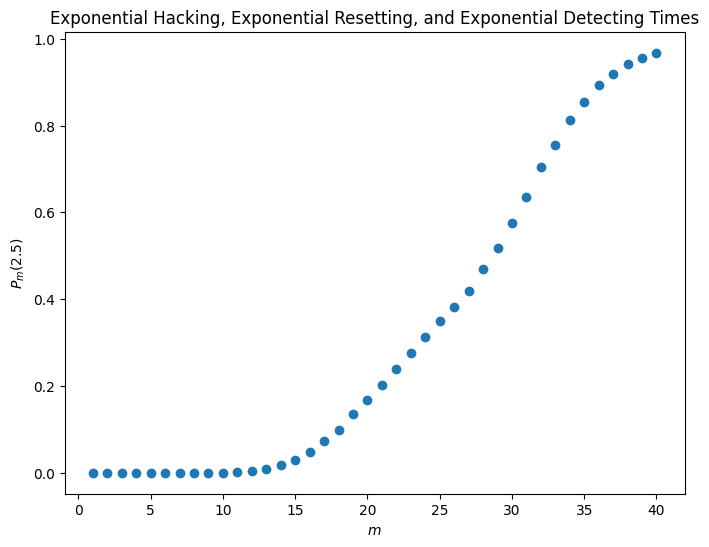

In [20]:
t_cross_section = 2.5
P_mt = sim.P_mt1(t_cross_section, m)
fig = plt.figure(figsize=(8, 6))
plt.scatter(range(1, m+1), P_mt)
plt.xlabel(r'$m$')
plt.ylabel(r'$P_m(2.5)$')
plt.title('Exponential Hacking, Exponential Resetting, and Exponential Detecting Times')
plt.show()

In [21]:
node = np.array(range(1, m+1))
t = np.array(np.linspace(0.1, 10, len(node)))
node_axis = np.repeat(np.nan, len(node)*len(t))
t_axis = np.repeat(np.nan, len(node)*len(t))
P_axis = np.repeat(np.nan, len(node)*len(t))
index = 0
for i in range(len(node)):
    for j in range(len(t)):
        node_axis[index] = node[i]
        t_axis[index] = t[j]
        P_axis[index] = sim.P_mt2(t_axis[index], int(node_axis[index]))
        index += 1
    print((format((i+1)/len(node), ".0%")))

2%
5%
8%
10%
12%
15%
18%
20%
22%
25%
28%
30%
32%
35%
38%
40%
42%
45%
48%
50%
52%
55%
57%
60%
62%
65%
68%
70%
72%
75%
78%
80%
82%
85%
88%
90%
92%
95%
98%
100%


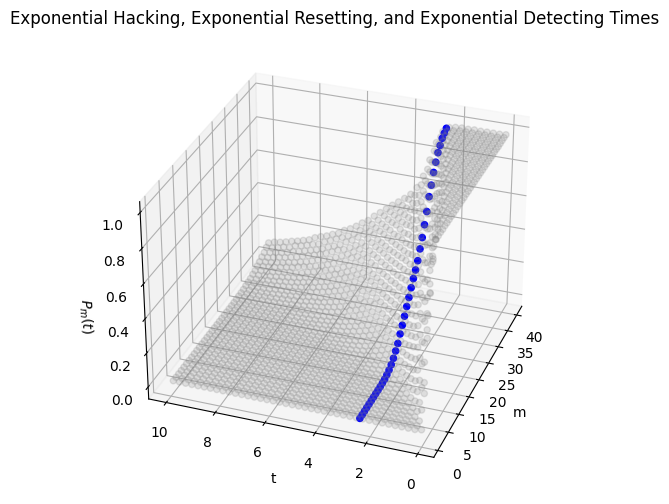

In [22]:
fig = plt.figure(figsize=(8, 6))
ax = plt.axes(projection='3d')
ax.scatter3D(node_axis, t_axis, P_axis, alpha=0.2, c='grey')
ax.scatter3D(node, np.repeat(t_cross_section, len(node)), P_mt, alpha=1, c='blue')
ax.view_init(30, 200)
ax.set_yticks(np.linspace(0, 10, 6))
ax.set_xlabel('m')
ax.set_ylabel('t')
ax.set_zlabel(r'$P_m(t)$')
ax.set_title('Exponential Hacking, Exponential Resetting, and Exponential Detecting Times')
plt.show()

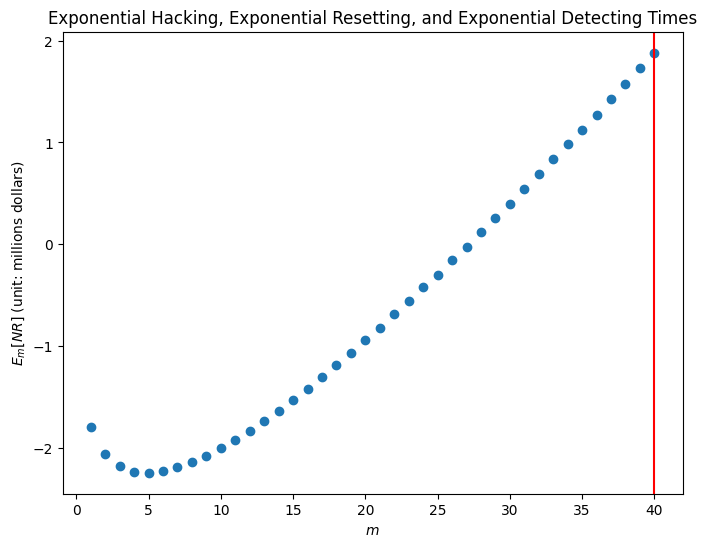

In [23]:
expected_net_revenue = sim.E_mNR(2,2,.2, m, 500)
m_max = np.where(expected_net_revenue == max(expected_net_revenue))[0][0] + 1
fig = plt.figure(figsize=(8, 6))
plt.scatter(range(1, m+1), expected_net_revenue)
plt.axvline(x = m_max, c='red')
plt.xlabel(r'$m$')
plt.ylabel(r'$E_m[NR]$ (unit: millions dollars)')
plt.title('Exponential Hacking, Exponential Resetting, and Exponential Detecting Times')
plt.show()

In [24]:
max(expected_net_revenue), m_max

(1.8811936688911304, 40)